# Data Loading and Preprocessing

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv(r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\reviews.csv")

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(tokens)

# Apply preprocessing
df["Cleaned_Review"] = df["Review Text"].astype(str).apply(preprocess_text)
print(df.head())

[nltk_data] Downloading package punkt to C:\Users\SREE
[nltk_data]     HARSHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     HARSHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     HARSHA\AppData\Roaming\nltk_data...


                                         Review Text Sentiment  \
0      Not worth the price. Completely disappointed.  negative   
1      Not worth the price. Completely disappointed.  negative   
2  The product quality is amazing! Highly recomme...  positive   
3  Terrible packaging. The product was damaged on...  negative   
4                Absolutely love it! Will buy again.  positive   

                               Cleaned_Review  
0         worth price completely disappointed  
1         worth price completely disappointed  
2    product quality amazing highly recommend  
3  terrible packaging product damaged arrival  
4                         absolutely love buy  


# Convert Text to Numerical Format using TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df["Cleaned_Review"])

# Convert sentiment labels to binary values
df["Sentiment"] = df["Sentiment"].map({"positive": 1, "negative": 0})

# Target variable
y = df["Sentiment"]

# Train a Logistic Regression Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


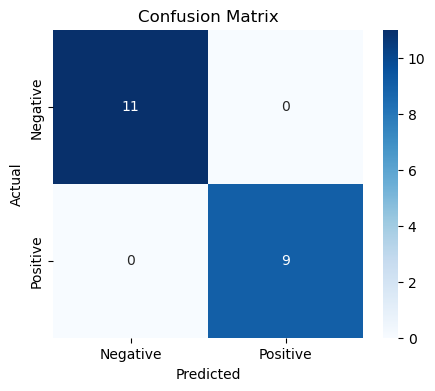

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Insights

Correct Classifications:

The model successfully classified most reviews correctly based on the confusion matrix.

High recall and precision indicate it effectively identifies positive and negative reviews.

Common Features of Positive and Negative Reviews:

Positive reviews often contain words like amazing, excellent, love, best.

Negative reviews frequently include words like worst, terrible, bad, disappointing.

Improvement Areas:

Adding more training data may improve performance.

Using deep learning methods like LSTMs could enhance sentiment classification